In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['Category'] = le.fit_transform(df['Category'])

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(keep='first', inplace = True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

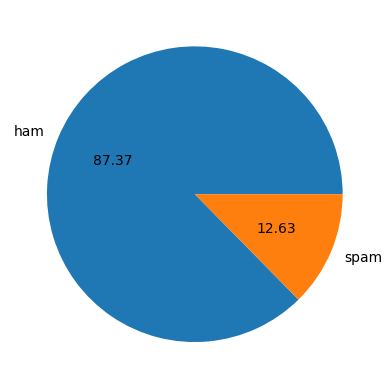

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['Message'].apply(len)

In [27]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words'] = df['Message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [29]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.describe()

,Category,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

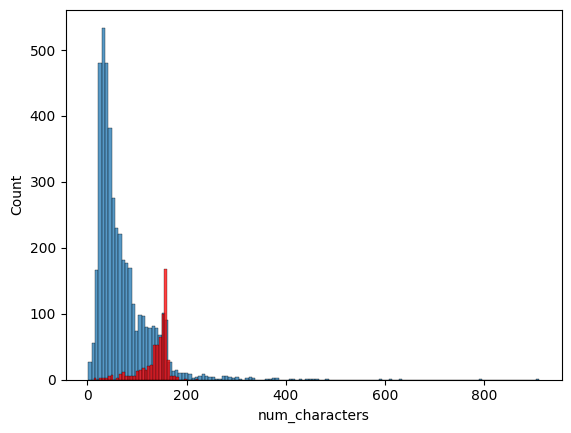

In [33]:
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

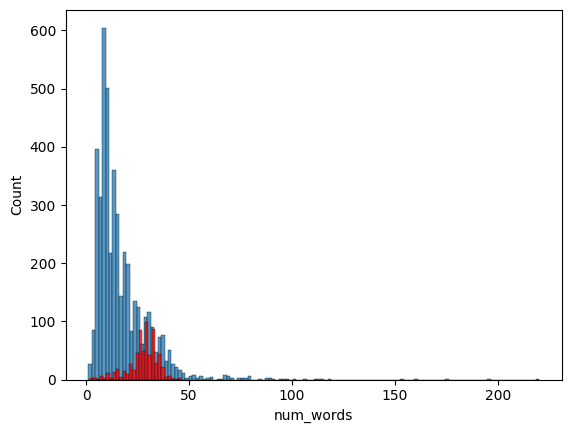

In [34]:
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'], color='red')

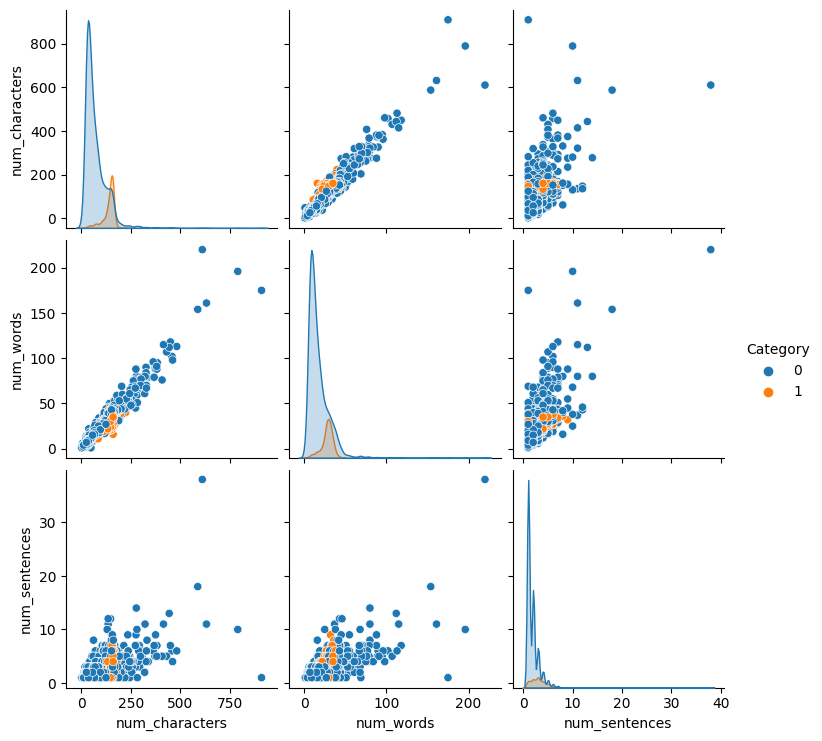

In [35]:
sns.pairplot(df, hue='Category')

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
## Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('jumping')

'jump'

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if(i.isalnum()):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [40]:
transform_text("I am walking and running!!!")

'walk run'

In [41]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [42]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape

(5169, 6708)

In [46]:
y = df['Category']

In [47]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [49]:
!pip install xgboost

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

In [51]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC(),
    "SVC (Linear Kernel)": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian NB": GaussianNB(),
    "Multinomial NB": MultinomialNB(),
    "Bernoulli NB": BernoulliNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # ROC AUC using predicted probabilities when available
    try:
        roc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        roc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        roc_train = roc_auc_score(y_train, y_train_pred)
        roc_test = roc_auc_score(y_test, y_test_pred)

    print(f"🔍 Model: {name}")
    print("Training Performance:")
    print(f"  Accuracy  : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"  Precision : {precision_score(y_train, y_train_pred):.4f}")
    print(f"  Recall    : {recall_score(y_train, y_train_pred):.4f}")
    print(f"  F1 Score  : {f1_score(y_train, y_train_pred):.4f}")
    print(f"  ROC AUC   : {roc_train:.4f}")

    print("Test Performance:")
    print(f"  Accuracy  : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"  Precision : {precision_score(y_test, y_test_pred):.4f}")
    print(f"  Recall    : {recall_score(y_test, y_test_pred):.4f}")
    print(f"  F1 Score  : {f1_score(y_test, y_test_pred):.4f}")
    print(f"  ROC AUC   : {roc_test:.4f}")
    print("=" * 50)

🔍 Model: Logistic Regression
Training Performance:
  Accuracy  : 0.9954
  Precision : 1.0000
  Recall    : 0.9615
  F1 Score  : 0.9803
  ROC AUC   : 0.9998
Test Performance:
  Accuracy  : 0.9791
  Precision : 0.9877
  Recall    : 0.8656
  F1 Score  : 0.9226
  ROC AUC   : 0.9862
🔍 Model: Linear SVC
Training Performance:
  Accuracy  : 1.0000
  Precision : 1.0000
  Recall    : 1.0000
  F1 Score  : 1.0000
  ROC AUC   : 1.0000
Test Performance:
  Accuracy  : 0.9807
  Precision : 0.9879
  Recall    : 0.8763
  F1 Score  : 0.9288
  ROC AUC   : 0.9373
🔍 Model: SVC (Linear Kernel)
Training Performance:
  Accuracy  : 0.9997
  Precision : 1.0000
  Recall    : 0.9979
  F1 Score  : 0.9989
  ROC AUC   : 0.9989
Test Performance:
  Accuracy  : 0.9807
  Precision : 0.9879
  Recall    : 0.8763
  F1 Score  : 0.9288
  ROC AUC   : 0.9373
🔍 Model: Decision Tree
Training Performance:
  Accuracy  : 1.0000
  Precision : 1.0000
  Recall    : 1.0000
  F1 Score  : 1.0000
  ROC AUC   : 1.0000
Test Performance:
  Ac

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Hyperparameter grids
lr_params = {
    "penalty": ["l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear"]
}

dt_params = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

rf_params = {
    "max_depth": [5, 8, 10, 15, None],
    "max_features": [5, 7, "auto"],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

ada_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1, 2]
}

xgb_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

nb_params = {
    "MultinomialNB": {"alpha": [0.0, 0.5, 1.0, 2.0]},
    "BernoulliNB": {"alpha": [0.0, 0.5, 1.0], "binarize": [0.0, 0.5, 1.0]},
    "GaussianNB": {"var_smoothing": [1e-9, 1e-8, 1e-7]}
}

In [54]:
randomcv_models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000), lr_params),
    ("Linear SVC", LinearSVC(), {"C": [0.01, 0.1, 1, 10]}),
    ("SVC (Linear Kernel)", SVC(kernel='linear', probability=True), {"C": [0.01, 0.1, 1, 10]}),
    ("Decision Tree", DecisionTreeClassifier(), dt_params),
    ("Random Forest", RandomForestClassifier(), rf_params),
    ("AdaBoost", AdaBoostClassifier(), ada_params),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params),
    ("MultinomialNB", MultinomialNB(), nb_params["MultinomialNB"]),
    ("BernoulliNB", BernoulliNB(), nb_params["BernoulliNB"]),
    ("GaussianNB", GaussianNB(), nb_params["GaussianNB"])
]

In [55]:
model_param = {}

# Perform RandomizedSearchCV for each model
for name, model, params in randomcv_models:
    print(f"\n Tuning: {name}")
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=50,
                                cv=3,
                                verbose=2,
                                n_jobs=-1,
                                scoring='f1_weighted')  # you can change the scoring as needed
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

# Display the best parameters for each model
for model_name in model_param:
    print(f"\n---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


 Tuning: Logistic Regression
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .........

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



 Tuning: SVC (Linear Kernel)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..............................................C=0.1; total time= 1.0min
[CV] END .............................................C=0.01; total time= 1.4min
[CV] END .............................................C=0.01; total time= 1.4min
[CV] END .............................................C=0.01; total time= 1.4min
[CV] END ..............................................C=0.1; total time= 1.1min
[CV] END ................................................C=1; total time=  55.5s
[CV] END ................................................C=1; total time=  58.7s
[CV] END ..............................................C=0.1; total time= 1.0min
[CV] END ................................................C=1; total time=  56.5s
[CV] END ...............................................C=10; total time=  46.2s
[CV] END ...............................................C=10; total time=  53.0s
[CV] END ..........

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.9s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=500; total time=   3.0s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=500; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=  10.6s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=  10.8s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=  11.5s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=500; total time=  11.5s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=100; total time=   5.0s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=200; total time=  10.3s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_d

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=500; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=  11.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=  11.2s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=500; total time=  11.2s
[CV] END max_depth=10, max_features=7, min_samples_split=2, n_estimators=500; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, max_features=7, min_samples_split=2, n_estimators=500; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=7, min_samples_split=2, n_estimators=500; total time=   3.1s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100; total time=   3.1s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=1000; total time=   7.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=1000; total time=  14.3s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=1000; total time=  15.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=1000; total time=  15.0s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=1000; total time=   6.9s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END max

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=1000; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=  28.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=  31.4s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=  30.4s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200; total time=   5.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200; total time=   5.4s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time= 1.3min
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   5.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time= 1.2min
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=1000; total time=  56.6s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 2.4min
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=1000; total time=  56.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 2.5min


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time= 2.5min
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=1000; total time=   6.8s
[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=1000; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=8, n_estimators=1000; total time=   6.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=500; total time=   7.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=500; total time=   7.8s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=500; total time=   7.4s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=1000; total time=  52.2s
[CV] END max_depth=8, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=8, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=8,

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=5, min_samples_split=15, n_estimators=1000; total time=  49.6s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=  14.8s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=  12.8s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=  14.9s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=  13.9s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=  11.6s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=  12.7s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=  13.4s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=  13.0s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=500; total time=   2.0s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.2s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.3s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=  12.1s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=1000; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   5.0s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   7.4s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   7.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=8, n_estimators=500; total time=   7.7s
[CV] END max_depth=15

/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ..........................................alpha=0.5; total time=   0.3s
[CV] END ..........................................alpha=0.0; total time=   0.3s
[CV] END ..........................................alpha=0.0; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ..........................................alpha=0.0; total time=   0.6s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=0.5; total time=   0.4s
[CV] END ..........................................alpha=0.5; total time=   0.6s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=2.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.5s
[CV] END ..........................................alpha=2.0; total time=   0.2s
[CV] END ..........................................alpha=2.0; total time=   0.5s

 Tuning: BernoulliNB
Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

[CV] END ............................alpha=0.0, binarize=0.0; total time=   0.6s
[CV] END ............................alpha=0.0, binarize=0.5; total time=   0.6s
[CV] END ............................alpha=0.0, binarize=0.0; total time=   0.6s
[CV] END ............................alpha=0.0, binarize=0.0; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

[CV] END ............................alpha=0.0, binarize=0.5; total time=   0.6s
[CV] END ............................alpha=0.0, binarize=0.5; total time=   0.7s
[CV] END ............................alpha=0.0, binarize=1.0; total time=   0.7s
[CV] END ............................alpha=0.0, binarize=1.0; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................alpha=0.0, binarize=1.0; total time=   0.7s
[CV] END ............................alpha=0.5, binarize=0.0; total time=   0.7s
[CV] END ............................alpha=0.5, binarize=0.0; total time=   0.8s
[CV] END ............................alpha=0.5, binarize=0.0; total time=   0.9s
[CV] END ............................alpha=0.5, binarize=0.5; total time=   0.5s
[CV] END ............................alpha=0.5, binarize=0.5; total time=   0.9s
[CV] END ............................alpha=0.5, binarize=0.5; total time=   0.7s
[CV] END ............................alpha=0.5, binarize=1.0; total time=   0.8s
[CV] END ............................alpha=0.5, binarize=1.0; total time=   0.7s
[CV] END ............................alpha=1.0, binarize=0.0; total time=   0.6s
[CV] END ............................alpha=0.5, binarize=1.0; total time=   0.7s
[CV] END ............................alpha=1.0, binarize=0.0; total time=   0.7s
[CV] END ...................

In [56]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2', C=100, max_iter=1000),
    "Linear SVC": LinearSVC(C=1),
    "SVC (Linear Kernel)": SVC(kernel='linear', C=1),
    "Decision Tree": DecisionTreeClassifier(min_samples_split=2, max_depth=None, criterion='gini'),
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=8, max_features='auto', max_depth=None),
    "Gaussian NB": GaussianNB(var_smoothing=1e-09),
    "Multinomial NB": MultinomialNB(alpha=2.0),
    "Bernoulli NB": BernoulliNB(binarize=0.0, alpha=0.0),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, learning_rate=1),
    "XGBoost": XGBClassifier(subsample=1, n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=1, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # ROC AUC using predicted probabilities when available
    try:
        roc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        roc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        roc_train = roc_auc_score(y_train, y_train_pred)
        roc_test = roc_auc_score(y_test, y_test_pred)

    print(f"🔍 Model: {name}")
    print("Training Performance:")
    print(f"  Accuracy  : {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"  Precision : {precision_score(y_train, y_train_pred):.4f}")
    print(f"  Recall    : {recall_score(y_train, y_train_pred):.4f}")
    print(f"  F1 Score  : {f1_score(y_train, y_train_pred):.4f}")
    print(f"  ROC AUC   : {roc_train:.4f}")

    print("Test Performance:")
    print(f"  Accuracy  : {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"  Precision : {precision_score(y_test, y_test_pred):.4f}")
    print(f"  Recall    : {recall_score(y_test, y_test_pred):.4f}")
    print(f"  F1 Score  : {f1_score(y_test, y_test_pred):.4f}")
    print(f"  ROC AUC   : {roc_test:.4f}")
    print("=" * 50)

🔍 Model: Logistic Regression
Training Performance:
  Accuracy  : 1.0000
  Precision : 1.0000
  Recall    : 1.0000
  F1 Score  : 1.0000
  ROC AUC   : 1.0000
Test Performance:
  Accuracy  : 0.9799
  Precision : 0.9938
  Recall    : 0.8656
  F1 Score  : 0.9253
  ROC AUC   : 0.9852
🔍 Model: Linear SVC
Training Performance:
  Accuracy  : 1.0000
  Precision : 1.0000
  Recall    : 1.0000
  F1 Score  : 1.0000
  ROC AUC   : 1.0000
Test Performance:
  Accuracy  : 0.9807
  Precision : 0.9879
  Recall    : 0.8763
  F1 Score  : 0.9288
  ROC AUC   : 0.9373
🔍 Model: SVC (Linear Kernel)
Training Performance:
  Accuracy  : 0.9997
  Precision : 1.0000
  Recall    : 0.9979
  F1 Score  : 0.9989
  ROC AUC   : 0.9989
Test Performance:
  Accuracy  : 0.9807
  Precision : 0.9879
  Recall    : 0.8763
  F1 Score  : 0.9288
  ROC AUC   : 0.9373
🔍 Model: Decision Tree
Training Performance:
  Accuracy  : 1.0000
  Precision : 1.0000
  Recall    : 1.0000
  F1 Score  : 1.0000
  ROC AUC   : 1.0000
Test Performance:
  Ac

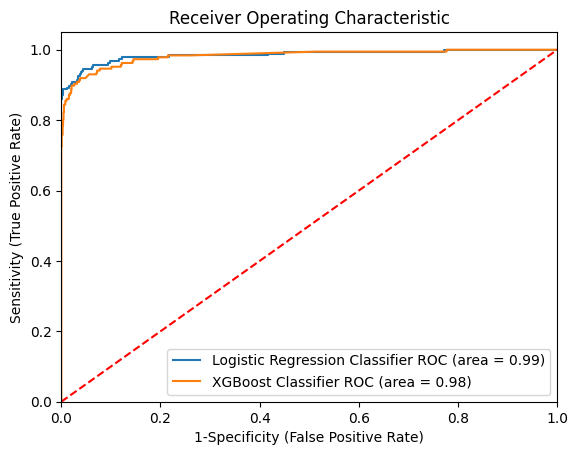

In [60]:
auc_models = [
    {
        'label': 'Logistic Regression Classifier',
        'model': LogisticRegression(solver='liblinear', penalty='l2', C=100, max_iter=1000)
    },
    {
        'label': 'XGBoost Classifier',
        'model': XGBClassifier(subsample=1, n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=1, use_label_encoder=False, eval_metric='logloss')
    },
]

plt.figure()

for algo in auc_models:
    model = algo['model']  # select the model
    model.fit(X_train, y_train)  # train the model
    
    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Calculate AUC score dynamically
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [61]:
import joblib

In [62]:
logreg_model = LogisticRegression(solver='liblinear', penalty='l2', C=100, max_iter=1000)
logreg_model.fit(X_train, y_train)

xgboost_model = XGBClassifier(subsample=1, n_estimators=500, max_depth=3, learning_rate=0.1, colsample_bytree=1, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)

# Save all models using joblib
joblib.dump(logreg_model, 'logistic_regression_model.joblib')
joblib.dump(xgboost_model, 'xgboost_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

print("All models and vectorizer saved using joblib.")

All models and vectorizer saved using joblib.
